<a href="https://colab.research.google.com/github/karlychann/neuro140/blob/main/uvfp_testxgboost_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final models trained on the entire dataset, with and without biased features

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from io import BytesIO
import pickle
import requests
pd.set_option('display.max_columns', None)

In [ ]:
all_features = ['F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0',
       'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0',
       'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope',
       'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope',
       'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
       'mfcc1_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm',
       'mfcc3_sma3_amean', 'mfcc3_sma3_stddevNorm', 'mfcc4_sma3_amean',
       'mfcc4_sma3_stddevNorm', 'jitterLocal_sma3nz_amean',
       'jitterLocal_sma3nz_stddevNorm', 'shimmerLocaldB_sma3nz_amean',
       'shimmerLocaldB_sma3nz_stddevNorm', 'HNRdBACF_sma3nz_amean',
       'HNRdBACF_sma3nz_stddevNorm', 'logRelF0-H1-H2_sma3nz_amean',
       'logRelF0-H1-H2_sma3nz_stddevNorm', 'logRelF0-H1-A3_sma3nz_amean',
       'logRelF0-H1-A3_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean',
       'F1frequency_sma3nz_stddevNorm', 'F1bandwidth_sma3nz_amean',
       'F1bandwidth_sma3nz_stddevNorm', 'F1amplitudeLogRelF0_sma3nz_amean',
       'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F2frequency_sma3nz_amean',
       'F2frequency_sma3nz_stddevNorm', 'F2bandwidth_sma3nz_amean',
       'F2bandwidth_sma3nz_stddevNorm', 'F2amplitudeLogRelF0_sma3nz_amean',
       'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'F3frequency_sma3nz_amean',
       'F3frequency_sma3nz_stddevNorm', 'F3bandwidth_sma3nz_amean',
       'F3bandwidth_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean',
       'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'alphaRatioV_sma3nz_amean',
       'alphaRatioV_sma3nz_stddevNorm', 'hammarbergIndexV_sma3nz_amean',
       'hammarbergIndexV_sma3nz_stddevNorm', 'slopeV0-500_sma3nz_amean',
       'slopeV0-500_sma3nz_stddevNorm', 'slopeV500-1500_sma3nz_amean',
       'slopeV500-1500_sma3nz_stddevNorm', 'spectralFluxV_sma3nz_amean',
       'spectralFluxV_sma3nz_stddevNorm', 'mfcc1V_sma3nz_amean',
       'mfcc1V_sma3nz_stddevNorm', 'mfcc2V_sma3nz_amean',
       'mfcc2V_sma3nz_stddevNorm', 'mfcc3V_sma3nz_amean',
       'mfcc3V_sma3nz_stddevNorm', 'mfcc4V_sma3nz_amean',
       'mfcc4V_sma3nz_stddevNorm', 'alphaRatioUV_sma3nz_amean',
       'hammarbergIndexUV_sma3nz_amean', 'slopeUV0-500_sma3nz_amean',
       'slopeUV500-1500_sma3nz_amean', 'spectralFluxUV_sma3nz_amean',
       'loudnessPeaksPerSec', 'VoicedSegmentsPerSec',
       'MeanVoicedSegmentLengthSec', 'StddevVoicedSegmentLengthSec',
       'MeanUnvoicedSegmentLength', 'StddevUnvoicedSegmentLength',
       'equivalentSoundLevel_dBp']


# from classification_wo_correlated_features.ipynb features that correlate least with biased features
uncorrelated_features = ['mfcc4V_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope', 'mfcc1_sma3_amean',
       'F3bandwidth_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F1frequency_sma3nz_stddevNorm', 'jitterLocal_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope',
       'alphaRatioV_sma3nz_stddevNorm', 'mfcc1_sma3_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope', 'mfcc4_sma3_amean',
       'F3frequency_sma3nz_amean', 'mfcc2_sma3_amean',
       'VoicedSegmentsPerSec', 'F1bandwidth_sma3nz_amean',
       'mfcc2V_sma3nz_amean', 'F3frequency_sma3nz_stddevNorm',
       'hammarbergIndexV_sma3nz_stddevNorm',
       'logRelF0-H1-H2_sma3nz_amean', 'slopeV500-1500_sma3nz_stddevNorm',
       'F2bandwidth_sma3nz_amean', 'mfcc3_sma3_amean',
       'F2bandwidth_sma3nz_stddevNorm', 'alphaRatioV_sma3nz_amean',
       'mfcc2_sma3_stddevNorm', 'mfcc1V_sma3nz_amean',
       'slopeUV0-500_sma3nz_amean', 'mfcc1V_sma3nz_stddevNorm',
       'mfcc3V_sma3nz_amean', 'F2frequency_sma3nz_amean',
       'logRelF0-H1-A3_sma3nz_amean', 'hammarbergIndexV_sma3nz_amean',
       'F1bandwidth_sma3nz_stddevNorm', 'mfcc3_sma3_stddevNorm',
       'mfcc2V_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean',
       'F2frequency_sma3nz_stddevNorm',
       'logRelF0-H1-H2_sma3nz_stddevNorm', 'mfcc4V_sma3nz_stddevNorm',
       'mfcc4_sma3_stddevNorm', 'F3bandwidth_sma3nz_amean',
       'mfcc3V_sma3nz_stddevNorm', 'slopeV0-500_sma3nz_stddevNorm']

In [ ]:
# load pretrained model
# model_name = 'less-biased'
# training_model_name = 'rf'
# task = 'speech'
# feature_set = uncorrelated_features

# url_path = f'https://github.com/danielmlow/vfp/blob/main/data/output/{training_model_name}_{model_name}_{task}.pkl?raw=true' # speech models trained on reading task
# mfile = BytesIO(requests.get(url_path).content) # load from url
# model = pickle.load(mfile)

# Extracting features on your own wav files using egemaps

To test on your own data, the test set should match our features (egemaps) using the the same variables and sampling rate (16k)

In [ ]:
# from os.path import exists
# # config: depends whether you're on Google Colab or local


# # Get URL from github csv by clicking on Download > Copy Link Address

# load_from_google_drive = False

# if load_from_google_drive:
#       # On google colab
#       # Mount GDrive and attach it to the colab for data I/O
#     from google.colab import drive
#     drive.mount('/content/drive')
#     input_dir = '/content/drive/My Drive/datum/vfp/data/input/'
#     output_dir = '/content/drive/My Drive/datum/vfp/data/output/'
#     os.makedirs(output_dir, exist_ok=True)

# else:
#   # If using jupyter-lab or jupyter notebook, load locally:
#   input_dir = './data/input/'
#   output_dir = './data/output/'



In [ ]:
from google.colab import drive
drive.flush_and_unmount()

from google.colab import drive
drive.mount('/content/drive')
input_dir = '/content/drive/My Drive/neuro140/vfp/data/input/'
output_dir = '/content/drive/My Drive/neuro140/vfp/data/output/'
os.makedirs(output_dir, exist_ok=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/neuro140/vfp/data/archive.zip -d /content/drive/MyDrive/neuro140/vfp/data

In [ ]:
! grep 'Vocal fold paralysis' /content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/*.txt

/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice087-info.txt:Diagnosis:	hypokinetic dysphonia (Vocal fold paralysis)
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice093-info.txt:Diagnosis:	hypokinetic dysphonia (Vocal fold paralysis)
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice112-info.txt:Diagnosis:	hypokinetic dysphonia (Vocal fold paralysis)
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice136-info.txt:Diagnosis:	hypokinetic dysphonia (Vocal fold paralysis)
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice170-info.txt:Diagnosis:	hyperkinetic dysphonia (Vocal fold paralysis)


In [ ]:
# ! grep 'healthy' /content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/*.txt | head

/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice002-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice019-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice024-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice025-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice032-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice034-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice040-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice045-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice049-info.txt:Diagnosis:	healthy
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice051-info.txt:Diagnosis:	healthy


In [ ]:
#pip install wfdb scipy

In [ ]:
# import wfdb
# from scipy.io.wavfile import write

# def wfdb_to_wav(input_path, output_path, channel=0):
#     """
#     Convert a WFDB file to a WAV file.

#     Parameters:
#     - input_path: Path to the input WFDB file.
#     - output_path: Path to the output WAV file.
#     - channel: The channel of the WFDB file to convert (default is 0)
#     """
#     # Read the WFDB file
#     record = wfdb.rdrecord(input_path)

#     # Extract the signal from the specified channel
#     signal = record.p_signal[:, channel]

#     # Normalize the signal to be in the range of int16 (required for WAV files)
#     signal_normalized = ((signal - signal.min()) / (signal.max() - signal.min()) * (2**15 - 1) - 2**15).astype('int16')

#     # Write the normalized signal to a WAV file
#     # Note: The sample rate is set according to the WFDB record's sampling frequency
#     write(output_path, record.fs, signal_normalized)


# new_data = ['voice087', 'voice093', 'voice112', 'voice136', 'voice170',
#             'voice002', 'voice019', 'voice024', 'voice025', 'voice032']
# for input in new_data:
#   wfdb_to_wav(f'/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/{input}'
#               , f'/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/{input}.wav')


In [ ]:
# ! rm /content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice001.wav


In [ ]:
! ls /content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/*.wav

/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice002.wav
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice019.wav
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice024.wav
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice025.wav
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice032.wav
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice087.wav
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice093.wav
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice112.wav
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice136.wav
/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/voice170.wav


In [ ]:
# !pip install -q opensmile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.2/996.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.4/138.4 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# import glob
# import opensmile

In [ ]:
# wav_dir = '/content/drive/MyDrive/neuro140/vfp/data/VOICEDDATASET/*.wav'
# wav_paths = glob.glob(wav_dir)

In [ ]:
# smile = opensmile.Smile(
#             feature_set=opensmile.FeatureSet.eGeMAPSv02, #or path to conf: 'gemaps/eGeMAPSv02.conf'
#             feature_level=opensmile.FeatureLevel.Functionals,
#             sampling_rate=16000,
#             resample=True,
#             # num_workers = 4,
#             verbose=True,
#         )
# feature_vectors = smile.process_files(wav_paths)
# df_voiced = feature_vectors.reset_index()


In [ ]:
! find '/content/drive/MyDrive/neuro140/vfp/data/' -name '*.csv**'

/content/drive/MyDrive/neuro140/vfp/data/extracted_voiced.csv


In [ ]:
df_voiced = pd.read_csv('/content/drive/MyDrive/neuro140/vfp/data/extracted_voiced.csv')

# XGBoost Model (without hyperparameter tuning)

In [ ]:
training_model_name = 'xgboost'

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score
import pandas as pd
import pickle


for task in ['speech', 'vowel']:
    df = pd.read_csv(f'https://github.com/danielmlow/vfp/raw/main/data/input/features/egemaps_vector_{task}_cpp.csv', index_col=0)

    if task == 'speech':
        df = pd.concat([df, df_voiced])

    for feature_set, model_name in zip([all_features, uncorrelated_features],
                                       ['biased', 'less-biased']):

        X = df[feature_set].values
        y = df['target'].values

        model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

        cv = StratifiedKFold(n_splits=5)

        cv_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')

        print(f'5-Fold CV ROC AUC Scores for {task} - {model_name} - {training_model_name}:', cv_scores)
        print(f'Mean CV ROC AUC for {task} - {model_name} - {training_model_name} :', cv_scores.mean())

        model.fit(X, y)

        output_path = f'{output_dir}{task}_{model_name}_{training_model_name}.pkl'
        with open(output_path, 'wb') as f:
            pickle.dump(model, f)

        print(f'Completed training and saving for {task} - {model_name} - {training_model_name}with mean CV ROC AUC: {cv_scores.mean()}')


5-Fold CV ROC AUC Scores for speech - biased - xgboost: [0.94865865 0.93293247 0.92962963 0.91016548 0.89598109]
Mean CV ROC AUC for speech - biased - xgboost : 0.9234734642135198
Completed training and saving for speech - biased - xgboostwith mean CV ROC AUC: 0.9234734642135198
5-Fold CV ROC AUC Scores for speech - less-biased - xgboost: [0.88482886 0.83718779 0.87546296 0.9248227  0.88652482]
Mean CV ROC AUC for speech - less-biased - xgboost : 0.8817654263884606
Completed training and saving for speech - less-biased - xgboostwith mean CV ROC AUC: 0.8817654263884606
5-Fold CV ROC AUC Scores for vowel - biased - xgboost: [0.9705314  0.86183575 0.88309179 0.88599034 0.89651838]
Mean CV ROC AUC for vowel - biased - xgboost : 0.8995935301208198
Completed training and saving for vowel - biased - xgboostwith mean CV ROC AUC: 0.8995935301208198
5-Fold CV ROC AUC Scores for vowel - less-biased - xgboost: [0.95555556 0.8705314  0.88454106 0.84347826 0.84526112]
Mean CV ROC AUC for vowel - les

# Hyperparameter tuned XGBoost Model

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import pandas as pd
import pickle

training_model_name = 'xgboost'

random_seed = 42

new_param_grids = {
    ('speech', 'biased') : {
        'n_estimators': [200],
        'max_depth': [9],
        'learning_rate': [0.1],
        'min_child_weight': [5],
        'subsample': [0.8],
        'colsample_bytree': [0.6]
    },
    ('speech', 'less-biased') : {
        'n_estimators': [200],
        'max_depth': [3],
        'learning_rate': [0.2],
        'min_child_weight': [1],
        'subsample': [1.0],
        'colsample_bytree': [1.0]
    },
    ('vowel', 'biased') : {
        'n_estimators': [200],
        'max_depth': [9],
        'learning_rate': [0.01],
        'min_child_weight': [1],
        'subsample': [0.6],
        'colsample_bytree': [0.6]
    },
    ('vowel', 'less-biased') : {
        'n_estimators': [50],
        'max_depth': [3],
        'learning_rate': [0.2],
        'min_child_weight': [1],
        'subsample': [0.6],
        'colsample_bytree': [0.6]
    },
}


for task in ['speech', 'vowel']:
    df = pd.read_csv(f'https://github.com/danielmlow/vfp/raw/main/data/input/features/egemaps_vector_{task}_cpp.csv', index_col=0)
    if task == 'speech':
        df = pd.concat([df, df_voiced])

    for feature_set, model_name in zip([all_features, uncorrelated_features],
                                       ['biased', 'less-biased']):
        X = df[feature_set].values
        y = df['target'].values

        model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=random_seed)

        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)

        param_grid = new_param_grids[(task, model_name)]
        grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1)
        grid_search.fit(X, y)

        best_model = grid_search.best_estimator_

        print(f'Best parameters for {task} - {model_name}:', grid_search.best_params_)
        print(f'Best CV score for {task} - {model_name}:', grid_search.best_score_)

        output_path = f'{output_dir}{task}_{model_name}_{training_model_name}_hypertuned2.pkl'
        with open(output_path, 'wb') as f:
            pickle.dump(best_model, f)

        output_path = f'{output_dir}{task}_{model_name}_{training_model_name}_hypertunedparameters2.pkl'
        with open(output_path, 'wb') as f:
            pickle.dump(grid_search.best_params_, f)

        print(f'Model saved for {task} - {model_name} with parameters {grid_search.best_params_}')


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for speech - biased: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.8}
Best CV score for speech - biased: 0.9582565868366052
Model saved for speech - biased with parameters {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.8}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for speech - less-biased: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}
Best CV score for speech - less-biased: 0.9248676636858877
Model saved for speech - less-biased with parameters {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for vowel 

#Hyperparameter grid for XGBoost tuning

In [ ]:

from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import pandas as pd
import pickle

random_seed = 42

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

for task in ['speech', 'vowel']:
    df = pd.read_csv(f'https://github.com/danielmlow/vfp/raw/main/data/input/features/egemaps_vector_{task}_cpp.csv', index_col=0)
    if task == 'speech':
        df = pd.concat([df, df_voiced])

    for feature_set, model_name in zip([all_features, uncorrelated_features],
                                       ['biased', 'less-biased']):
        X = df[feature_set].values
        y = df['target'].values

        model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=random_seed)

        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)

        grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=cv, verbose=1, n_jobs=-1)
        grid_search.fit(X, y)

        best_model = grid_search.best_estimator_

        print(f'Best parameters for {task} - {model_name}:', grid_search.best_params_)
        print(f'Best CV score for {task} - {model_name}:', grid_search.best_score_)

        output_path = f'{output_dir}{task}_{model_name}_{training_model_name}_hypertuned.pkl'
        with open(output_path, 'wb') as f:
            pickle.dump(best_model, f)

        output_path = f'{output_dir}{task}_{model_name}_{training_model_name}_hypertunedparameters.pkl'
        with open(output_path, 'wb') as f:
            pickle.dump(grid_search.best_params_, f)

        print(f'Model saved for {task} - {model_name} with parameters {grid_search.best_params_}')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Permutation feature importance


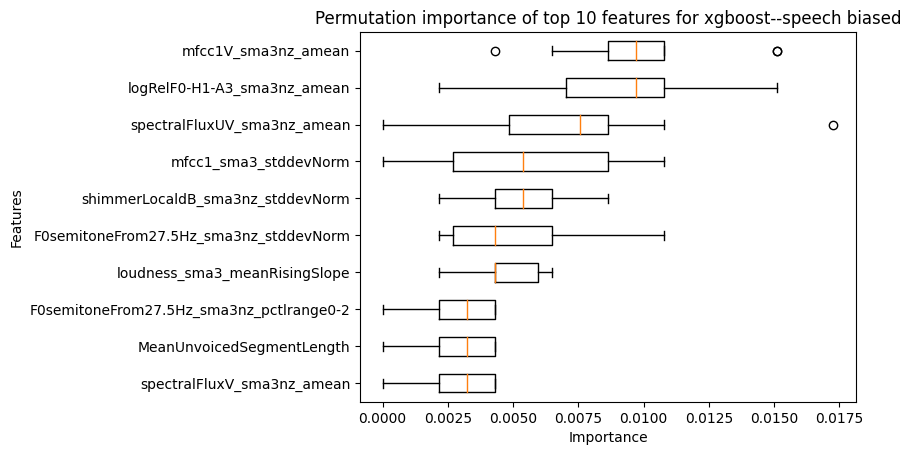

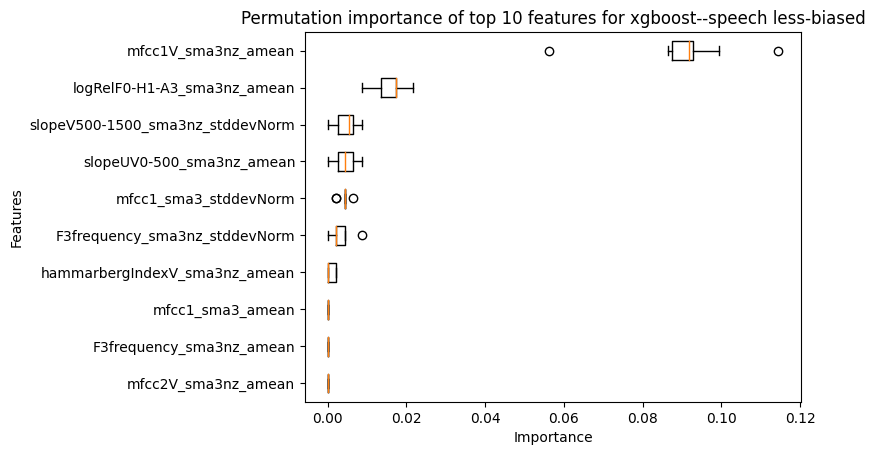

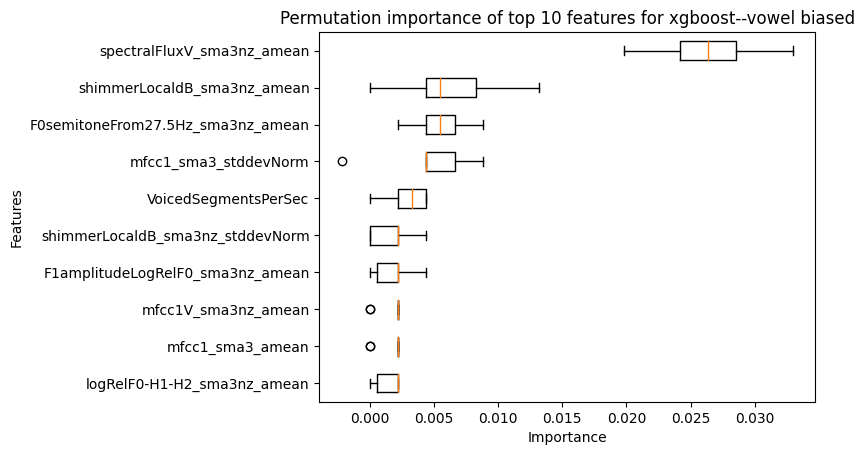

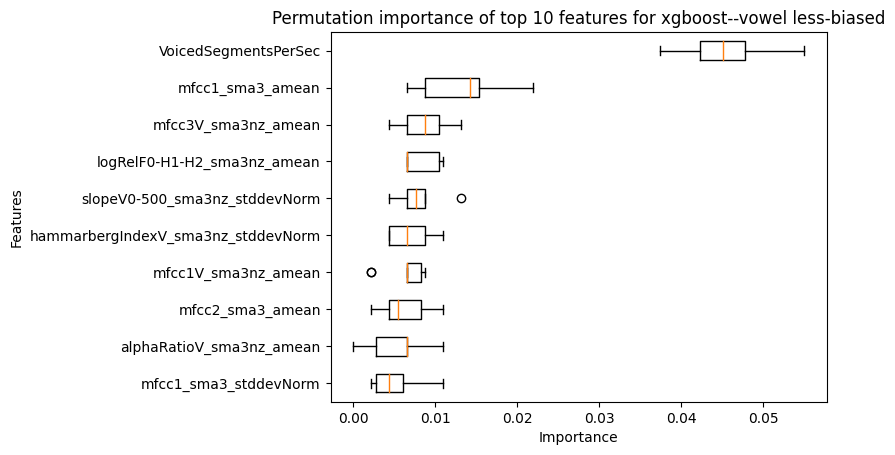

In [ ]:
training_model_name = 'xgboost'

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import pandas as pd
import pickle
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

for task in ['speech', 'vowel']:
    df = pd.read_csv(f'https://github.com/danielmlow/vfp/raw/main/data/input/features/egemaps_vector_{task}_cpp.csv', index_col=0)
    if task == 'speech':
        df = pd.concat([df, df_voiced])

    for feature_set, model_name in zip([all_features, uncorrelated_features],
                                       ['biased', 'less-biased']):
        X = df[feature_set].values
        y = df['target'].values

        input_file = f'{output_dir}{task}_{model_name}_{training_model_name}_hypertuned2.pkl'
        with open(input_file, 'rb') as f:
            best_model = pickle.load(f)

        result = permutation_importance(best_model, X, y, n_repeats=10, random_state=42, n_jobs=-1)

        sorted_idx = result.importances_mean.argsort()
        sorted_results = result.importances[sorted_idx]
        sorted_results = sorted_results[-10:]

        fig, ax = plt.subplots()
        ax.boxplot(sorted_results.T,
                  vert=False, labels=np.array(feature_set)[sorted_idx][-10:])
        ax.set_title(f"Permutation importance of top 10 features for {training_model_name}--{task} {model_name}")
        ax.set_ylabel("Features")
        ax.set_xlabel("Importance")
        plt.show()

# Other features

In [ ]:
cpp_features = ['cpp_amean', 'cpp_stddevNorm', 'cpp_percentile20', 'cpp_percentile80']